In [1]:
!pip install --user matplotlib




[notice] A new release of pip is available: 23.1.2 -> 23.3.1
[notice] To update, run: C:\Users\Mazen Mohamed\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip


In [2]:
import cv2
import urllib
import numpy as np
import matplotlib.pyplot as plt

# Input your image
I'm using an online example. You should import the different test cases provided.

In [202]:
img = cv2.imread('C:/Users/Mazen Mohamed/PycharmProjects/cvphase1/15-GoneWithTheWind.jpg')

if img is not None:
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

else:
    print("unable to read")

In [203]:
# Switch between the following two samples if you want to see different examples
# req = urllib.request.urlopen('https://th.bing.com/th/id/OIP.7DVS2NnborRqWtxdJVK2GAHaJ4?w=3024&h=4032&rs=1&pid=ImgDetMain')

#https://aishack.in/static/img/tut/sudoku-original.jpg
#https://sources.roboflow.com/dcbM99GUgvVCEMo4F2rq8vaVApB2/DSJGI2e7g77XqctWIGQG/original.jpg
#https://th.bing.com/th/id/OIP.jBUdypHLT_QgxqIb-ZYzNwHaFj?w=2304&h=1728&rs=1&pid=ImgDetMain
#https://th.bing.com/th/id/OIP.R2FXM2QBD9FssNJGftJ2LwHaJ4?w=864&h=1152&rs=1&pid=ImgDetMain
#https://th.bing.com/th/id/OIP.Altpl_JzS-TN8bAcpQYtSwAAAA?pid=ImgDet&w=186&h=329&c=7&dpr=1.3
#https://www.asianscientist.com/wp-content/uploads/bfi_thumb/Sudoku-Saves-Photographers-From-Copyright-Theft-2v598pitnw2vs3a6bz0yyo.jpg


# arr = np.asarray(bytearray(req.read()), dtype=np.uint8)
# img = cv2.imdecode(arr, -1) # 'Load it as it is'
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)



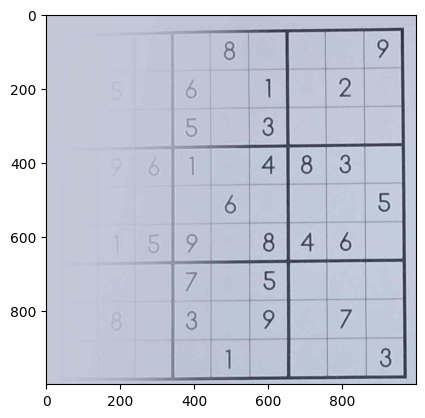

In [204]:
plt.imshow(img_rgb);


# Convert to grayscale
We don't need any color information.

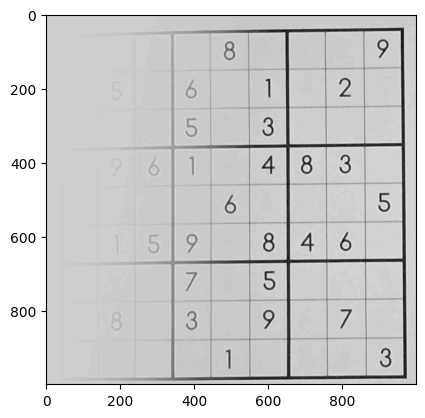

In [205]:
img_gray = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2GRAY)
plt.imshow(img_gray, cmap="gray");

In [206]:
img_gray_equalized = cv2.equalizeHist(img_gray)
img_gray_blurred = cv2.GaussianBlur(img_gray_equalized, (3, 3), 0) 



# Thresholding step
We don't need the full scale of grayscale either, just binary. But, is ordinary thresholding enough? Or is "adaptive thresholding" better?

Do your research!


### Adaptive Thresholding is better because it will adapt to the change of light intensity along the image as we see here global thresholding will alaways result in losing some of the image due to the change of light intensity along the image

Text(0.5, 1.0, 'Global Thresholding')

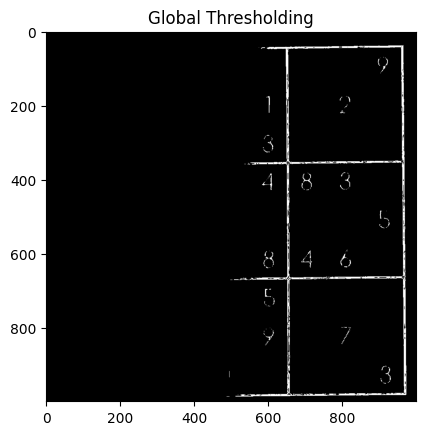

In [207]:
_, img_gray_global_threshed = cv2.threshold(img_gray, 70, 255, cv2.THRESH_BINARY_INV)
plt.imshow(img_gray_global_threshed, cmap='gray')
plt.title('Global Thresholding')



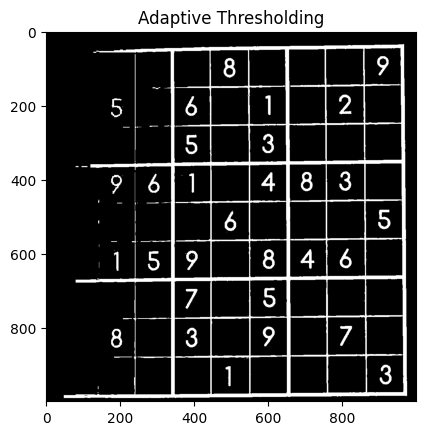

In [214]:
img_gray_threshed = cv2.adaptiveThreshold(src=img_gray,
    maxValue=255,
    adaptiveMethod=cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
    thresholdType=cv2.THRESH_BINARY_INV,
    blockSize=201,
    C=5
)
plt.title('Adaptive Thresholding') 
plt.imshow(img_gray_threshed, cmap="gray");

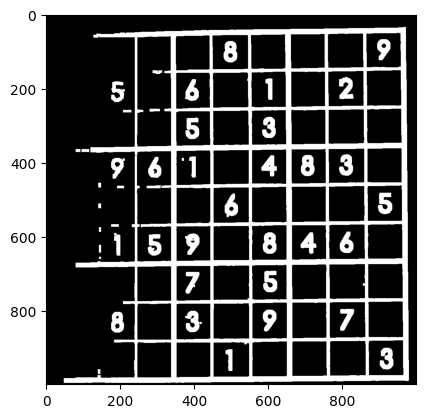

In [215]:
####################ADDED just trying some morphological methods################
kernel1 =np.ones((2,2),np.uint8)
dilation=cv2.dilate(img_gray_threshed,kernel1,iterations=5)
erosion=cv2.erode(dilation,kernel1,iterations=1)
closing =cv2.morphologyEx(img_gray_threshed,cv2.MORPH_CLOSE,kernel1,iterations=1)
opeining =cv2.morphologyEx(dilation,cv2.MORPH_OPEN,kernel1,iterations=1)
erosion=cv2.erode(opeining,kernel1,iterations=2)
plt.imshow(dilation,cmap="gray")


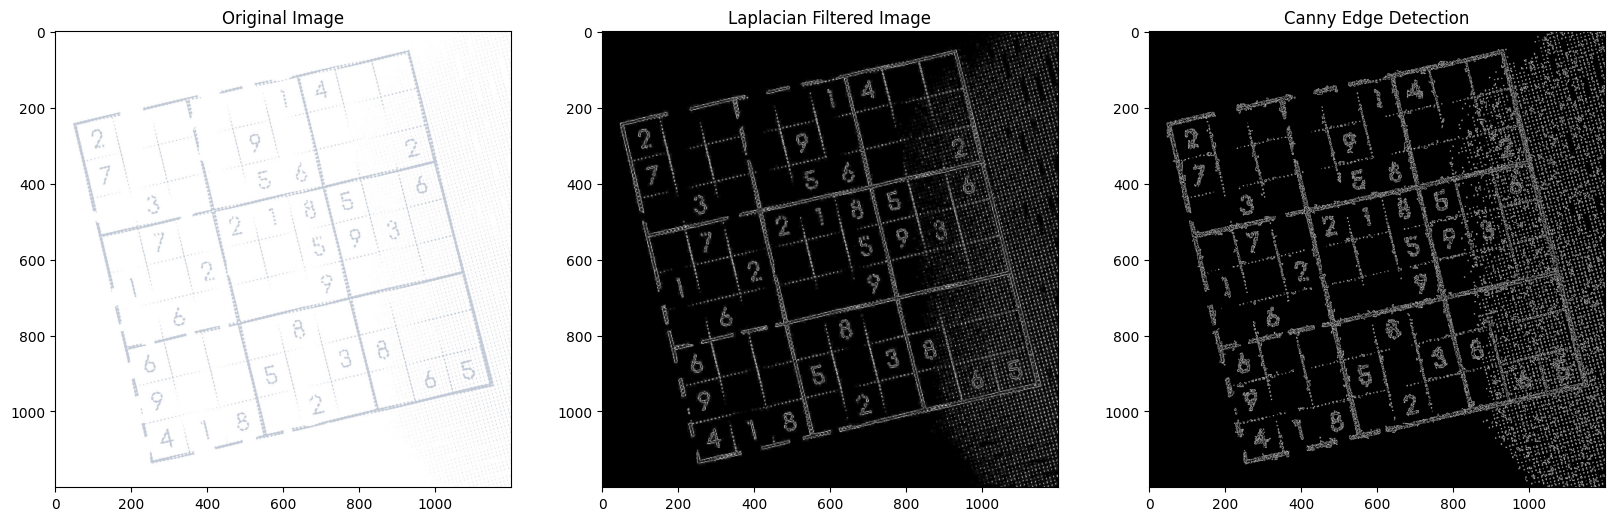

In [198]:
###########Added by Mazen###################
# Load the original image
image_original = cv2.imread('C:/Users/Mazen Mohamed/PycharmProjects/cvphase1/16-SomethingWentTerriblyWrongHere.jpg', cv2.IMREAD_COLOR)

# Convert image to grayscale
image_gray = cv2.cvtColor(image_original, cv2.COLOR_BGR2GRAY)

# Reduce noise in image
img = cv2.GaussianBlur(image_gray, (3, 3), 0)

# Filter the image using Laplacian
filtered_image = cv2.Laplacian(image_gray, cv2.CV_16S, ksize=3)
filtered_image = cv2.convertScaleAbs(filtered_image)

# Apply Canny edge detection on the filtered image
edges = cv2.Canny(filtered_image, threshold1=40, threshold2=250)  # Adjust thresholds as needed

# Plotting the results
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 15))
ax1.set_title('Original Image')
ax1.imshow(cv2.cvtColor(image_original, cv2.COLOR_BGR2RGB))

ax2.set_title('Laplacian Filtered Image')
ax2.imshow(filtered_image, cmap='gray')

ax3.set_title('Canny Edge Detection')
ax3.imshow(edges, cmap='gray')

plt.show()


# Detect the lines
One way is to use Hough transform. It may not be the best way, there are other ways, and I've done zero noise removal in this guide so far.

This is very sub-optimal and will most likely not work reliably on all cases. Do your research!

### Enhancement : One way is getting the biggest contour in the image 

In [216]:
####################ADDED################
def biggestContour (contours):
    biggest=np.array([])

    max_area=0
    for i in contours:
        area=cv2.contourArea(i)
        if area>100:
            peri=cv2.arcLength(i,True)
            approx=cv2.approxPolyDP(i,0.02*peri,True)
            if area > max_area and len(approx)==4:
                biggest=approx
                max_area=area
    return biggest,max_area
def reorder(myPoints):
    myPoints=myPoints.reshape((4,2))
    myPointsNew=np.zeros((4,1,2),dtype=np.int32)
    add=myPoints.sum(1)
    myPointsNew[0]=myPoints[np.argmin(add)]
    myPointsNew[3]=myPoints[np.argmax(add)]
    diff=np.diff(myPoints,axis=1)
    myPointsNew[1]=myPoints[np.argmin(diff)]
    myPointsNew[2]=myPoints[np.argmax(diff)]
    return myPointsNew

    


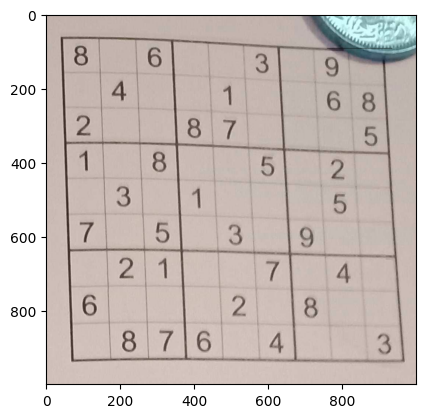

In [81]:
# image = cv2.imread('C:/Users/Mazen Mohamed/Downloads/05-Ya3amSheel2elCoinYa3am.jpg')
#
# points_to_remove = np.array([
#     [935, 92],
#     [800, 92],
#     [760, 92],
#     [790, 92],
#     [795, 92]
# ])
#
# # Create a mask to cover the points to be removed
# mask = np.zeros_like(image, dtype=np.uint8)
# cv2.fillPoly(mask, [points_to_remove], (255, 255, 255))  # Fill the points with white color (you can change the color)
#
# # Invert the mask
# mask_inv = cv2.bitwise_not(mask)
#
# # Apply the mask to the image to remove the specified points
# result = cv2.bitwise_and(image, mask_inv)
# res=cv2.cvtColor(result,cv2.COLOR_RGB2GRAY)
# plt.imshow(result,cmap="gray")

### Outer frame corners identification

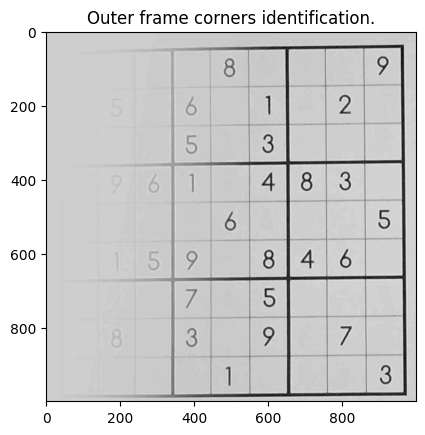

In [217]:
####################ADDED################
heightImg=600
widthImg=600
imgContours=img_gray.copy()
imgBigContour=img_gray.copy()
contours, hierarchy, =cv2.findContours(img_gray_threshed,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
cv2.drawContours(imgContours,contours,-1,(255,50,0),10)
biggest,maxArea=biggestContour(contours)
if biggest.size !=0:
    biggest=reorder(biggest)
    cv2.drawContours(imgBigContour,biggest,-1,(255,0,0),20)

    pts1=np.float32(biggest)
    pts2=np.float32([[0,0],[widthImg,0],[0,heightImg],[widthImg,heightImg]])
    matrix=cv2.getPerspectiveTransform(pts1,pts2)
    imgWrapedgrey=cv2.warpPerspective(img_gray,matrix,(widthImg,heightImg))
    # imgDetectedDigits=imgBlank.copy()

    # imgWrapedColored=cv2.cvtColor(imgWarpColored,cv2.COLOR_BGR2GRAY)
plt.title('Outer frame corners identification.') 
plt.imshow(imgBigContour,cmap="gray")

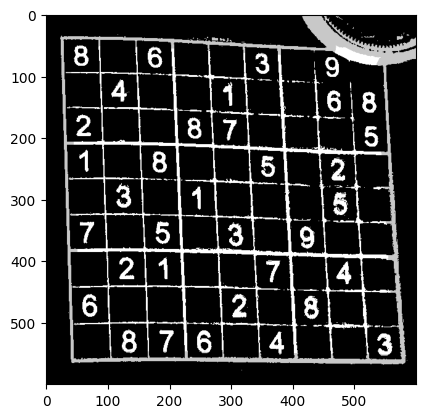

In [424]:
# # Assuming closed_image is your binary image
# contours, hier = cv2.findContours(img_gray_threshed, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
#
# # Sort contours based on their areas in descending order
# contours = sorted(contours, key=cv2.contourArea, reverse=True)
#
# # Initialize an empty mask
# mask = np.zeros(img_gray_threshed.shape, np.uint8)
#
# # Iterate through the sorted contours
# for cnt in contours:
#     area = cv2.contourArea(cnt)
#
#     # Filter contours based on your criteria, e.g., area > 1000
#     if area > 1000:
#         best_cnt = cnt
#
#         # Draw the largest contour filled with white on the mask
#         cv2.drawContours(mask, [best_cnt], 0, 255, thickness=cv2.FILLED)
#
#         # Draw the same contour with a thickness of 2 in black
#         cv2.drawContours(mask, [best_cnt], 0, 200, thickness=30)
#
#         break  # Assuming the first contour meeting the criteria is the Sudoku puzzle
#
# # Bitwise AND operation to mask the original image
# res = cv2.bitwise_and(img_gray_threshed, mask)
#
# # Display the result
# plt.imshow(res, cmap="gray")
# plt.show()

## Image warpping (Outer frame isolation)

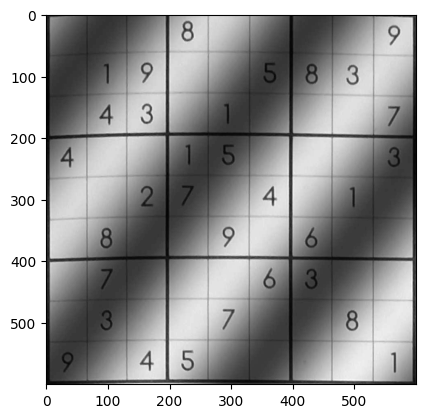

In [152]:
####################ADDED################
plt.imshow(imgWrapedgrey,cmap="gray")


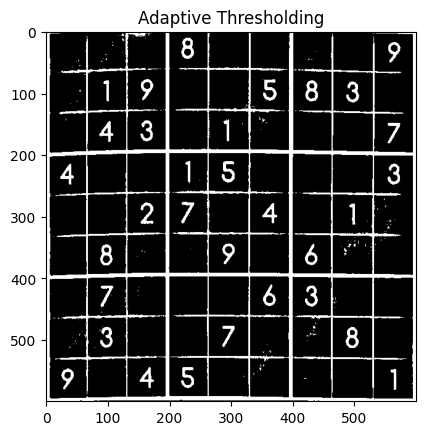

In [160]:
####################ADDED################

img_gray_threshed = cv2.adaptiveThreshold(src=imgWrapedgrey,
    maxValue=255,
    adaptiveMethod=cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
    thresholdType=cv2.THRESH_BINARY_INV,
    blockSize=97,
    C=5


)
plt.title('Adaptive Thresholding') 
plt.imshow(img_gray_threshed, cmap="gray");

# Separate the number tiles
Finally, you get each value in a tile of its own, ready to go to phase 2 (OCR).

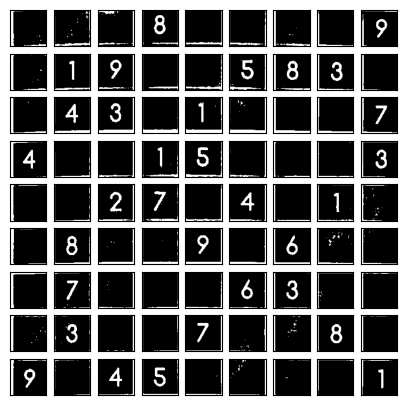

In [156]:
#CHANGED img_gray_threshed_warped to img_gray_threshed

M = img_gray_threshed.shape[0] // 9
N = img_gray_threshed.shape[1] // 9
number_tiles = []
for i in range(9):
    number_tiles.append([])
    for j in range(9):
        tile = img_gray_threshed[i*M:(i+1)*M, j*N:(j+1)*N]
        number_tiles[i].append(tile)

_, axes = plt.subplots(9, 9, figsize=(5, 5))
for i, row in enumerate(axes):
    for j, col in enumerate(row):
        col.imshow(number_tiles[i][j], cmap="gray");
        col.get_xaxis().set_visible(False)
        col.get_yaxis().set_visible(False)